## Import

In [0]:
## Import Pandas and Numpy
import pandas as pd
import numpy as np

In [0]:
## set column limit to 500

pd.set_option("display.max_columns",500)

In [4]:
## import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import random
import datetime
import warnings
import os
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### rcParams for better visualization!

In [0]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

### Data Import

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
%%time

train = pd.read_csv('/content/drive/My Drive/Shaastra Workshop Material/EDA_and_Preprocessing/data/train_foreclosure.csv')
test = pd.read_csv('/content/drive/My Drive/Shaastra Workshop Material/EDA_and_Preprocessing/data/test_foreclosure.csv')


CPU times: user 17.9 ms, sys: 14.5 ms, total: 32.5 ms
Wall time: 3.18 s


In [8]:
%%time
agreements = pd.read_excel('/content/drive/My Drive/Shaastra Workshop Material/EDA_and_Preprocessing/data/LMS_31JAN2019.xlsx')

CPU times: user 2min 59s, sys: 1.78 s, total: 3min 1s
Wall time: 3min 3s


### Raw Data Analysis

In [9]:
### print first 5 rows of train
train.head()

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1


In [10]:
### Same for test
test.head()

,AGREEMENTID,FORECLOSURE
0,11220003,NaN
1,11220004,NaN
2,11220005,NaN
3,11220007,NaN
4,11220009,NaN


In [11]:
agreements.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.45880,29042.4588,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.00000,0.0000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,2.439242e+06,2.439242e+06,0.000000,0.44171,0.0000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,2013-11-05,30898.0,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,2010-09-29,MUMBAI,28441.732656,28441.732656,0.0,7.211965e+06,7.211965e+06,0.000000,0.00000,0.0000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,2013-11-05,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,7.712034e+06,7.712034e+06,0.000000,0.00000,0.0000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,2013-11-05,91892.0,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [12]:
agreements.describe()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,SCHEMEID,MOB
count,6.242500e+05,6.237340e+05,6.242500e+05,6.242500e+05,624250.000000,624250.000000,624245.000000,624250.000000,624250.000000,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.122050e+05,624250.000000,624250.000000,624245.000000,624219.000000,624250.000000,6.237340e+05,624250.000000
mean,1.123081e+07,1.201179e+07,5.828204e+06,5.778192e+06,15.068840,14.997058,178.406491,177.910326,6.405117,6.221159e+04,6.201999e+04,1.915964e+02,1.868918e+06,1.832613e+06,3.630521e+04,2.176622e+05,2.088516e+05,8.810573e+03,2.768623e+04,5.303931e+06,5.320235e+05,9.637954e+05,5.442760e+06,4.855566e+04,48.825046,15.256937,163.149432,7.921803,21.479576,1.090119e+07,16.767239
std,7.984211e+03,7.961736e+03,1.323121e+07,1.313555e+07,2.506164,2.470942,49.490712,44.212338,3.533971,3.555793e+05,3.549530e+05,9.510358e+03,6.891111e+06,6.782725e+06,5.739616e+05,2.274487e+06,2.234830e+06,4.076866e+05,6.818236e+05,1.209923e+07,1.235317e+07,3.293273e+06,1.226295e+07,2.398423e+05,20.531984,15.549111,52.995329,65.112792,2687.131947,8.546587e+01,15.613276
min,1.122000e+07,1.200100e+07,3.753240e+04,3.753240e+04,-5.056636,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.734998e+07,-7.506479e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.380000,0.000000,0.000000,0.000000,-170.330000,1.090110e+07,0.000000
25%,1.122430e+07,1.200530e+07,1.516309e+06,1.501296e+06,13.109796,13.109796,150.000000,168.000000,5.000000,4.975868e+03,4.967033e+03,0.000000e+00,1.233145e+05,1.215195e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.104276e+00,1.441153e+06,1.406301e+04,8.360153e+04,1.469379e+06,1.040000e+04,32.780000,3.000000,128.000000,0.000000,0.400000,1.090111e+07,5.000000
50%,1.122894e+07,1.200993e+07,2.627268e+06,2.593211e+06,14.982624,14.982624,180.000000,180.000000,5.000000,1.222875e+04,1.221992e+04,0.000000e+00,4.614637e+05,4.531783e+05,0.000000e+00,1.104276e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.404174e+06,5.964873e+04,2.681067e+05,2.483012e+06,1.900000e+04,50.290000,10.000000,169.000000,0.000000,0.510000,1.090115e+07,12.000000
75%,1.123592e+07,1.201690e+07,5.209731e+06,5.166899e+06,17.167590,16.543314,203.000000,180.000000,5.000000,3.607449e+04,3.607449e+04,0.000000e+00,1.403642e+06,1.371928e+06,0.000000e+00,1.329548e+03,2.606091e+02,1.104276e+00,0.000000e+00,4.654986e+06,2.129521e+05,7.640072e+05,4.850362e+06,3.759200e+04,64.840000,23.000000,182.000000,0.000000,0.690000,1.090129e+07,24.000000
max,1.125335e+07,1.203390e+07,5.704924e+08,5.674589e+08,37.456560,34.147897,713.000000,300.000000,15.000000,3.177540e+07,3.177540e+07,2.089129e+06,3.936390e+08,3.888015e+08,5.899531e+07,2.841642e+08,2.841642e+08,7.734998e+07,5.672502e+07,5.674589e+08,4.885217e+09,1.845529e+08,5.674589e+08,8.496881e+07,104.860000,98.000000,693.000000,2268.000000,547616.000000,1.090146e+07,98.000000


## Datasets

In [13]:
# check null values in agreements dataframe
agreements.isna().sum()

AGREEMENTID                   0
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 5
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          8
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE          3787
LAST_RECEIPT_AMOUNT       12045
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_TENURE                5
DPD     

In [14]:
agreements['CUSTOMERID'].nunique()

32895

### MERGE

In [0]:
train_data = train.merge(agreements,on = 'AGREEMENTID',how= 'left').drop_duplicates()

In [17]:
train_data.head()

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39
1,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40
2,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41
3,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,1970-08-30,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,1974-02-02,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42
4,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43


## EDA

Build a function fe_to_do for feature engineering derived from EDA

scaling down maybe normalize, box-cox, 
will prefer normalize

In [18]:
agreements.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

### Univariate Analysis

In [0]:
categorical = train_data.select_dtypes(include=[np.object])
categorical = categorical.columns

numeric = train_data.select_dtypes(include=[np.int,np.float])
numeric = numeric.columns

In [20]:
categorical, numeric

(Index(['CITY', 'PRODUCT', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH'], dtype='object'),
 Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
        'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
        'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
        'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
        'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
        'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
        'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
        'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
       dtype='object'))

In [0]:
## although 'AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'SCHEMEID' ,comes as a categorical varaible only

## Target Analysis

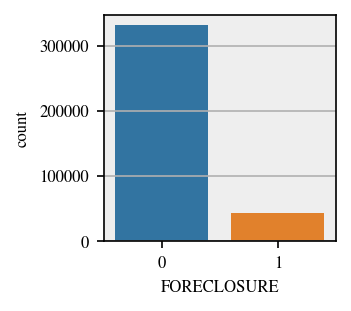

In [22]:
plt.figure(figsize=(2,2))
#### countplot of the target variable "Foreclosure"
## fill your code here

sns.countplot(train_data['FORECLOSURE'])

In [25]:
train_data['FORECLOSURE'].value_counts()

0    331719
1     42866
Name: FORECLOSURE, dtype: int64

## Variable Analysis

In [23]:
# use value_counts() method for variable "NPA_IN_LAST_MONTH"

train_data['NPA_IN_LAST_MONTH'].value_counts()

0      7308
#N/     508
Yes     214
NPA       3
yes       1
Name: NPA_IN_LAST_MONTH, dtype: int64

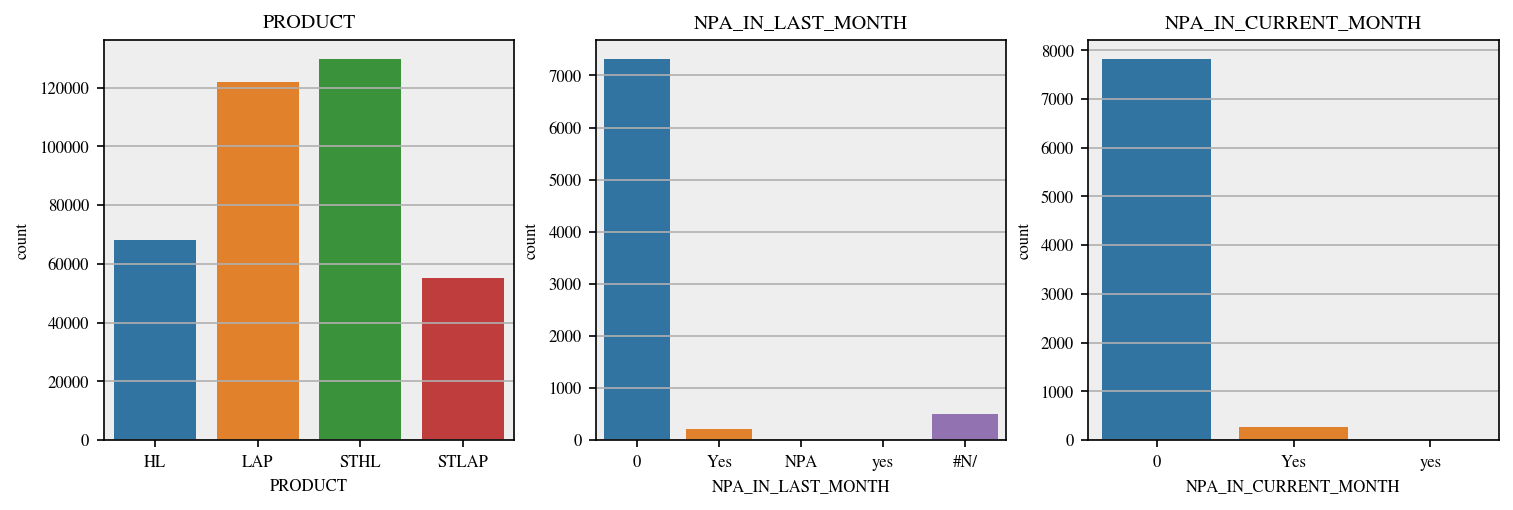

In [26]:
count = 0
plt.figure(figsize=(12,12))

for i in categorical.drop(['CITY']):
    count+=1
    plt.subplot(int(str(33)+str(count)))

    sns.countplot(train_data[i])
    plt.title(i)

plt.show()

### FE to do
1. include this small dummy categories into its parent categories, remove NPA_IN_LAST_MONTH, NPA_IN_CURRENT_MONTH

In [28]:
numeric

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
      dtype='object')

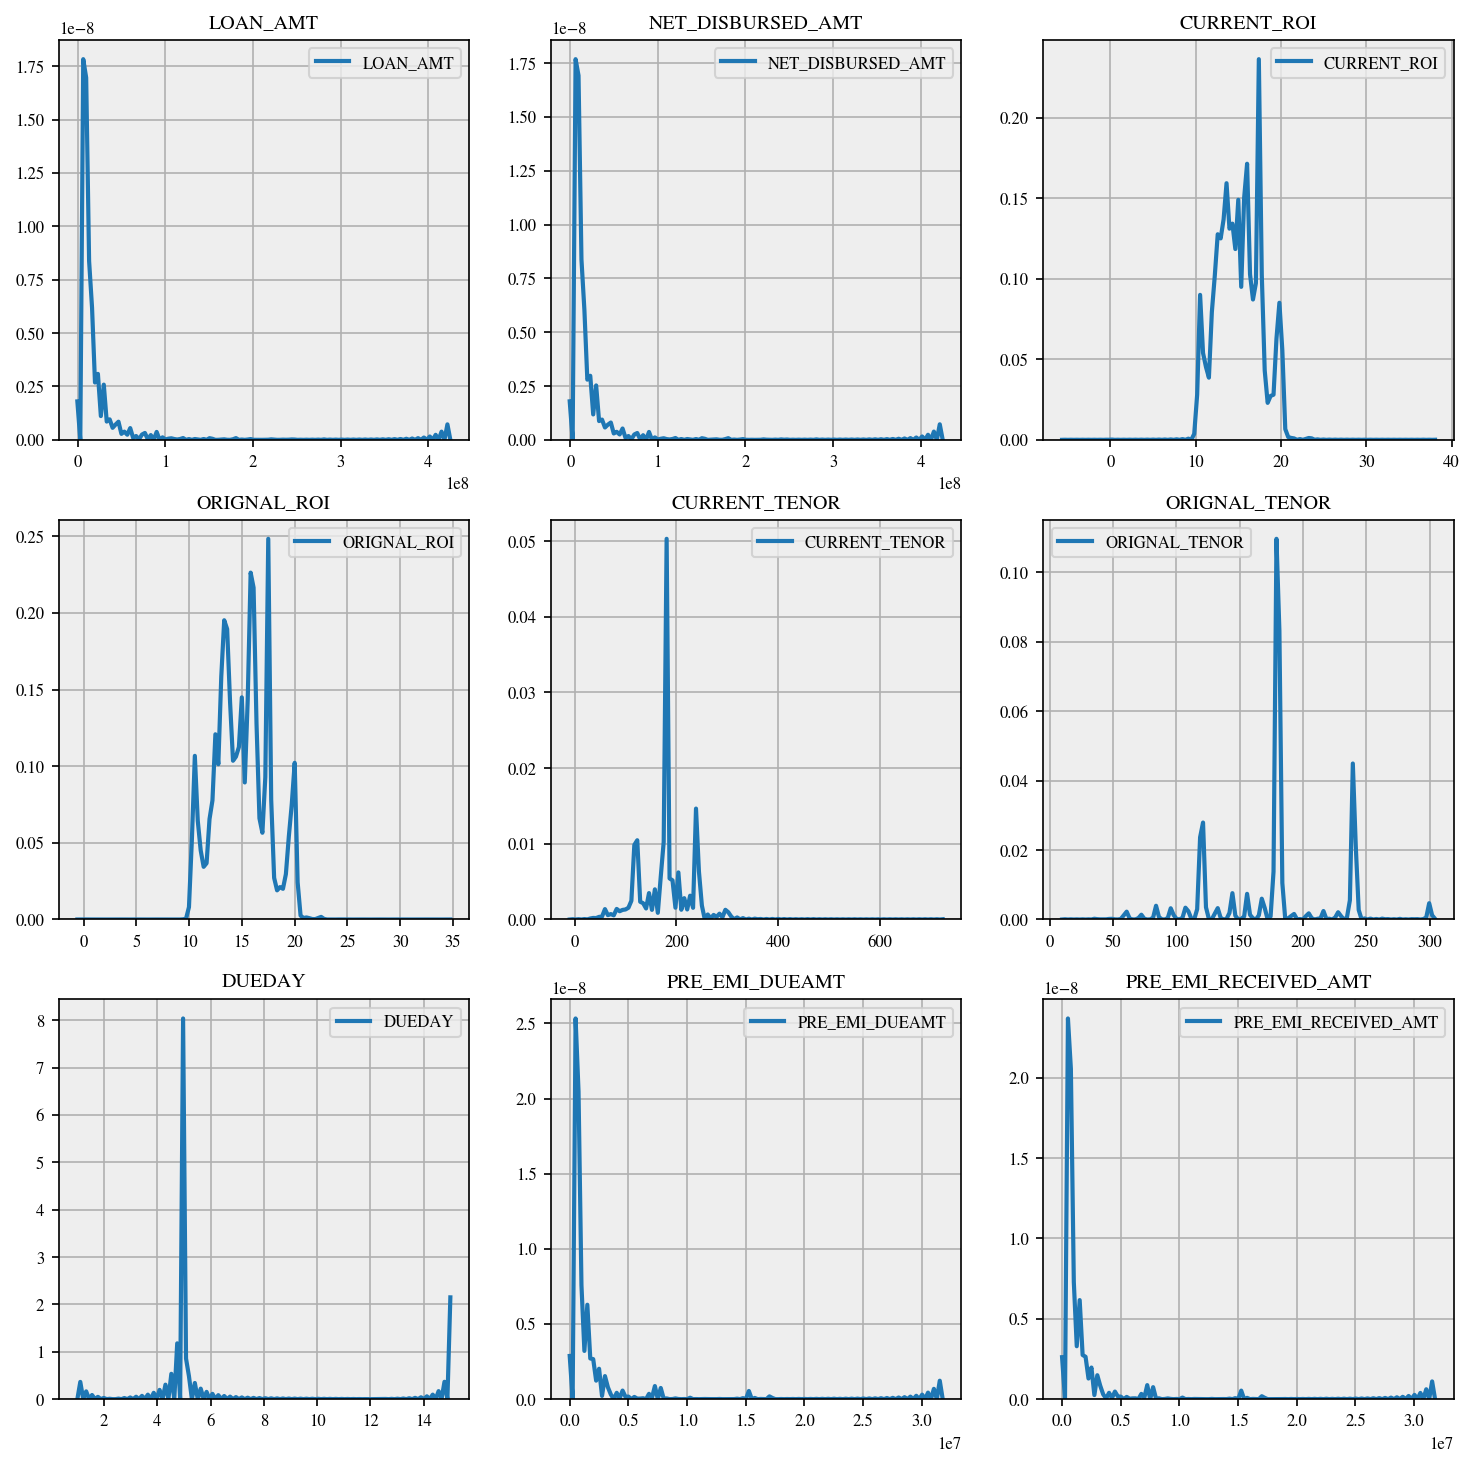

In [30]:
count = 0
done_list  = []

plt.figure(figsize=(12,12))

for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
        
        sns.kdeplot(train_data[i])

        plt.title(i)
        
        done_list.append(i)
        
plt.show()

## FE to do
1. normalize loan_amount, net_distributed,pre_emi_due, pre_emi_recieved, in both train and test using same kind of transformation

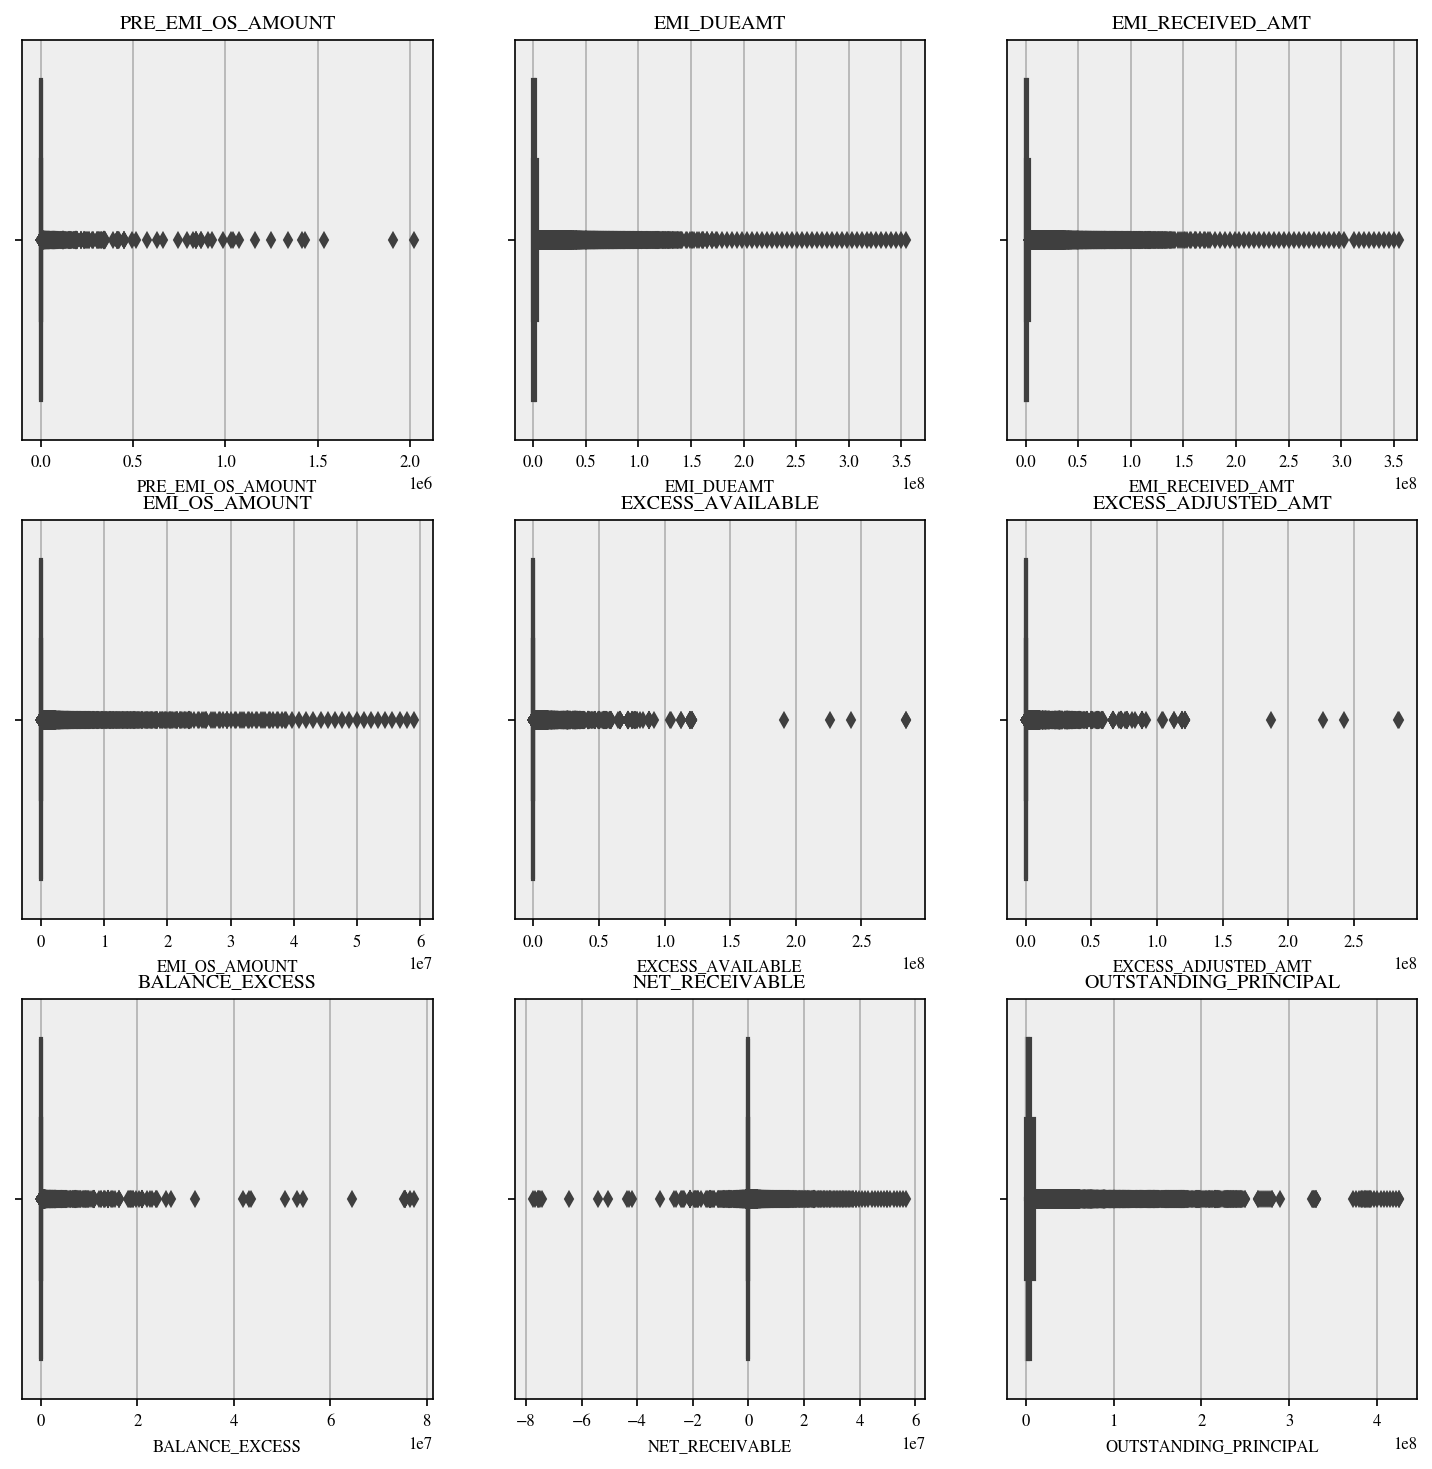

In [31]:
count = 0
plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
        sns.boxplot(train_data[i].dropna())
        plt.title(i)
        done_list.append(i)
plt.show()

## FE to do
1. scale down all of the above in both train and test using same kind of transformation

In [32]:
"""

Fill the code for remaining variable


"""

'\n\nFill the code for remaining variable\n\n\n'

## FE to do
1. scale down PAID_Principal, paid_intereset,monthopening,last_recipt_amount, in both train and test using same kind of transformation

## Bivariate Ananlysis

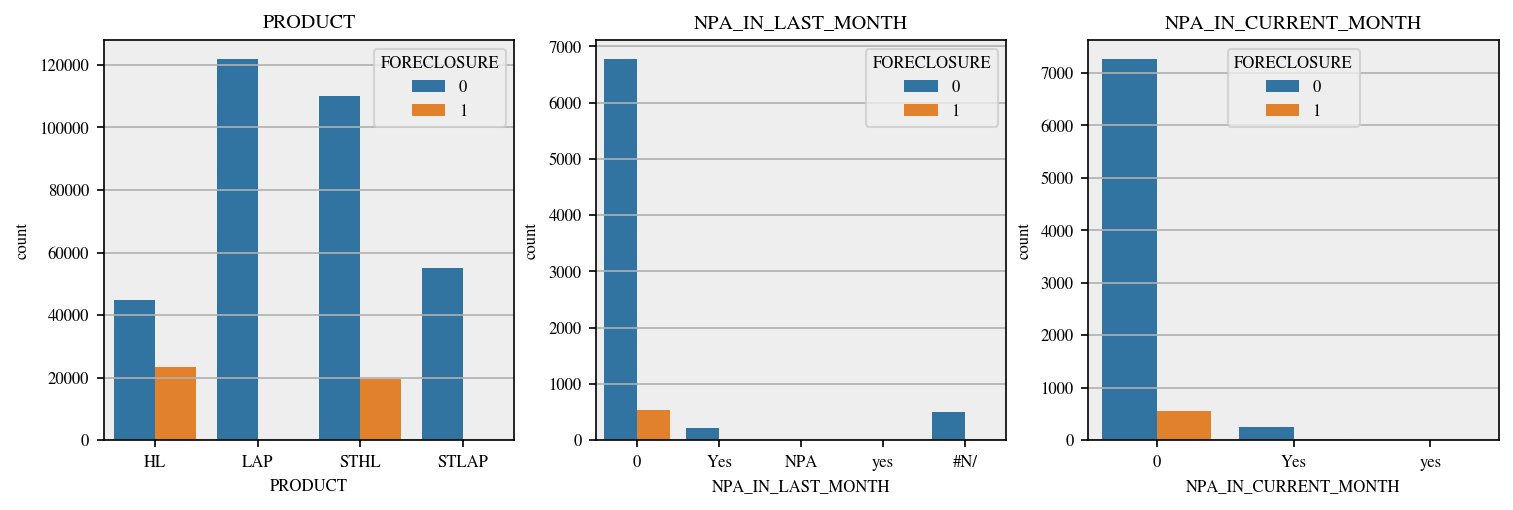

In [33]:
count = 0
plt.figure(figsize=(12,12))
for i in categorical.drop(['CITY']):
    count+=1
    plt.subplot(int(str(33)+str(count)))
#     plt.subplot()
    sns.countplot(train_data[i],hue = train_data['FORECLOSURE'])
    plt.title(i)
plt.show()

<Figure size 600x900 with 0 Axes>

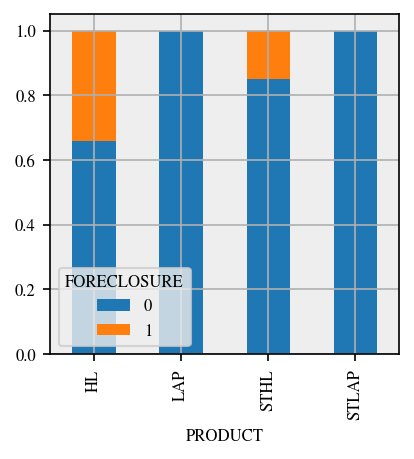

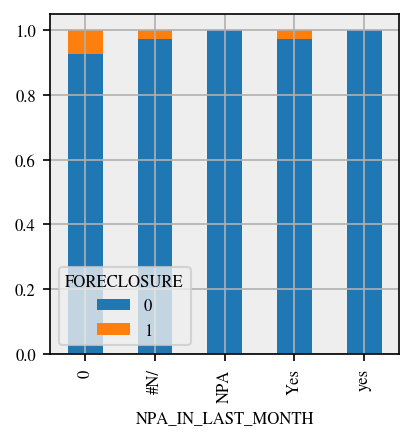

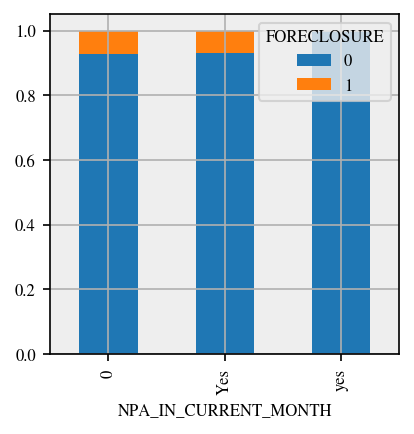

In [36]:
count = 0
plt.figure(figsize=(4,6))
for i in categorical.drop(['CITY']):
    count+=1

    var = pd.crosstab(train_data[i],train_data['FORECLOSURE']) 
    var.div(var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3))



### FE to do
1. we notice that LAP and STLAP agreements product never undergo foreclosure, so we can create a common feature named as is_lap_or_stlap
2. other thing to notice is that null NAP barely undergo foreclosure, anyways we will one-hot encode the feature so no need to create and extra one( although we will merge its subcategories into a major one, such as YES and yes)

In [0]:
#numeric vs target

In [38]:
numeric

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
      dtype='object')

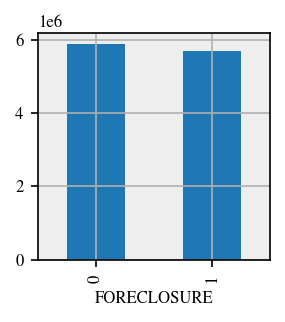

In [43]:
plt.figure(figsize=(2,2))
train_data.groupby(['FORECLOSURE'])['LOAN_AMT'].mean().plot(kind='bar')

##### we notice that foreclosure agreements loan amounts are slightly lower but still its more or less the same lets plot it for all numeric variables

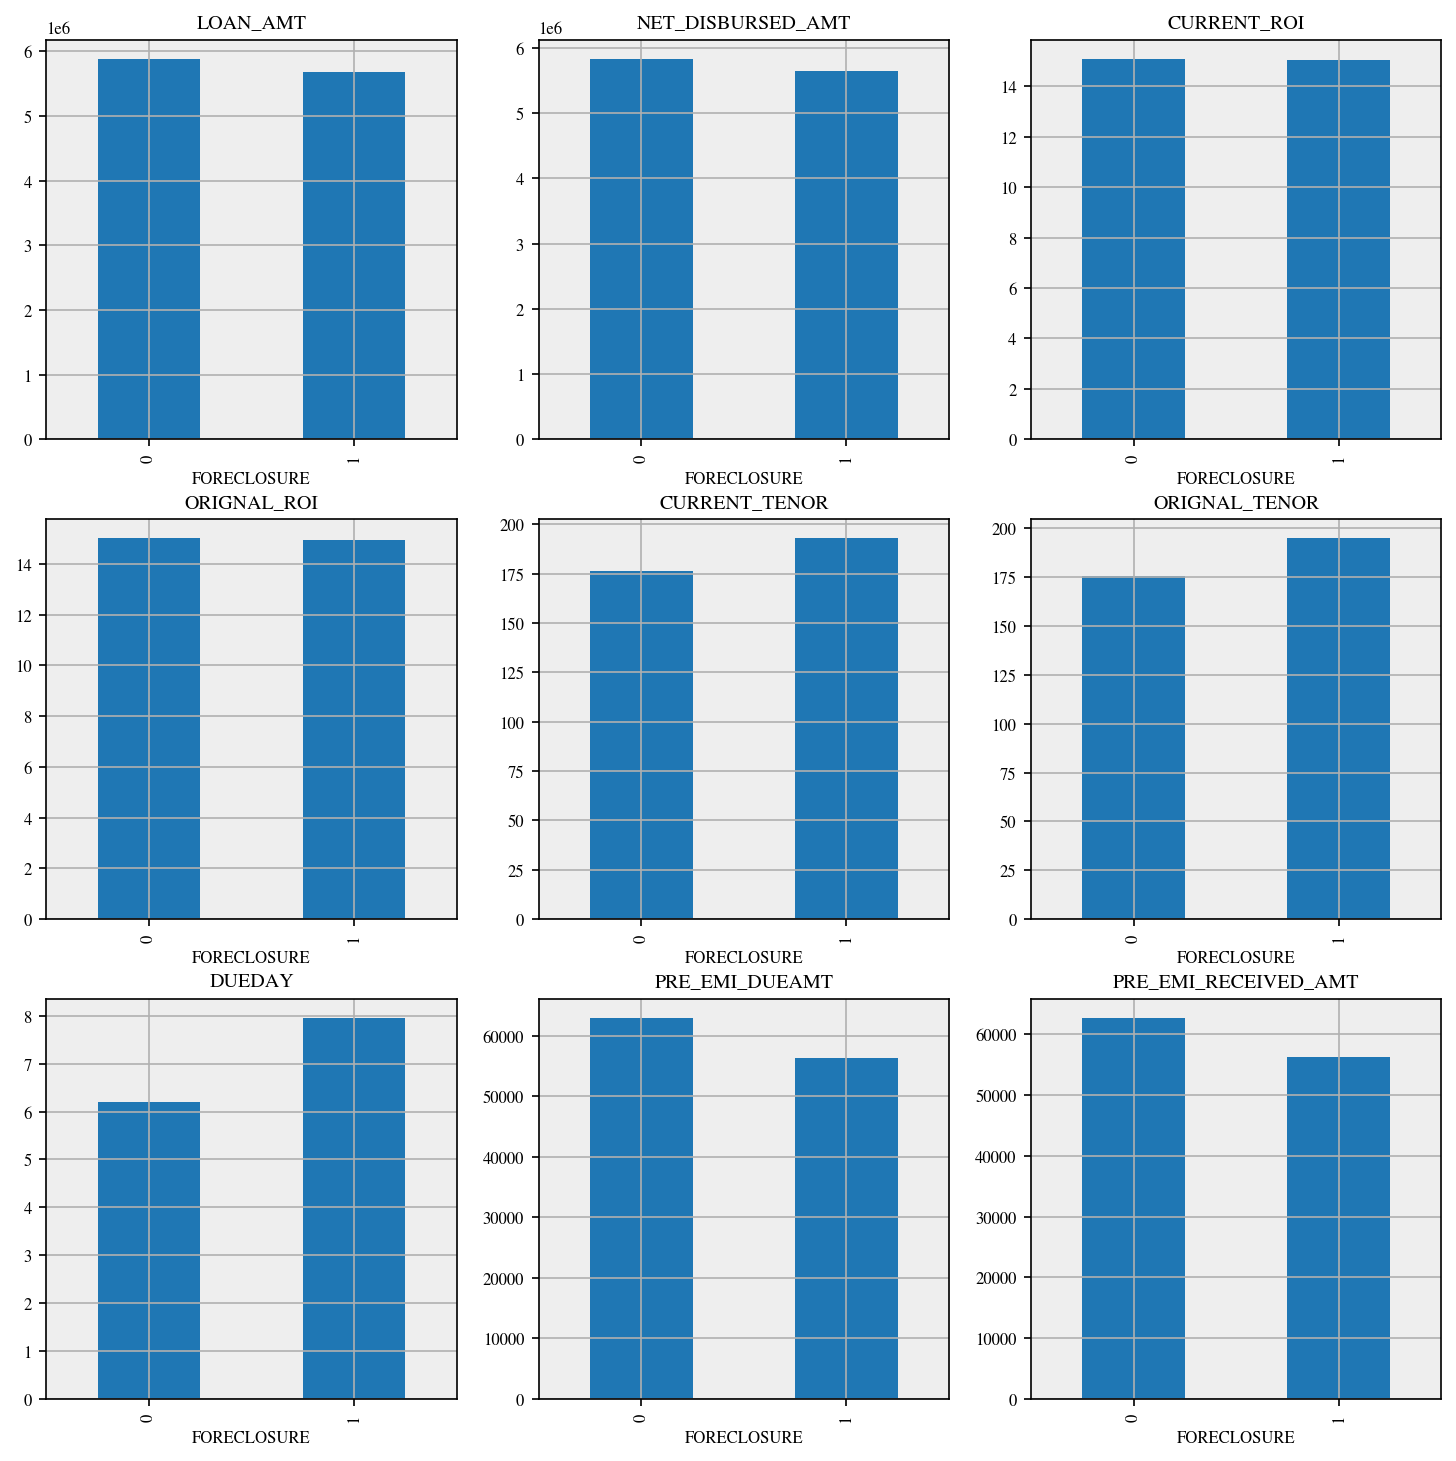

In [45]:
count = 0
done_list_new = []

plt.figure(figsize=(12,12))

for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list_new):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))

        train_data.groupby('FORECLOSURE')[i].mean().plot(kind='bar')

        plt.title(i)
        done_list_new.append(i)
plt.show()

1. LOAN_AMT , NET_DISTRIBUTED_AMT mean is lower for foreclosure, lets bin this variables to explore them more, while ROIs are exact same. 
2. both current and original tenor, and dueday are higher for forclosure which confirms the idleness of borrower, which lead to foreclosure
3. both pre_emi_due and recieved amt for non-foreclosure is higher, but lets check their diffrence whichis due-recieved, which will give a clear picture of what is happening


In [0]:
print(train_data['LOAN_AMT'].describe(), '\n')
print(train_data['NET_DISBURSED_AMT'].describe())

count    3.745850e+05
mean     5.859862e+06
std      1.269848e+07
min      3.753240e+04
25%      1.523815e+06
50%      2.627268e+06
75%      5.254535e+06
max      4.245665e+08
Name: LOAN_AMT, dtype: float64 

count    3.745850e+05
mean     5.813433e+06
std      1.261270e+07
min      3.753240e+04
25%      1.501296e+06
50%      2.579226e+06
75%      5.229163e+06
max      4.245665e+08
Name: NET_DISBURSED_AMT, dtype: float64


In [0]:
bins=[3.753240e+04,1.523815e+06, 2.627268e+06,5.254535e+06,4.245665e+08] 
group=['Low','Average','High', 'Very high'] 
train_data['LOAN_AMT_BINNED']=pd.cut(train_data['LOAN_AMT'],bins,labels=group)

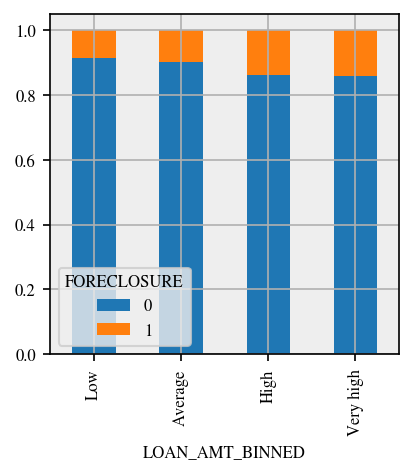

In [47]:
var = pd.crosstab(train_data['LOAN_AMT_BINNED'],train_data['FORECLOSURE']) 
var.div(var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3))

1. for low and average loan_amount, foreclosure is slightly more
2. and from the stats above it seems that net_amnt would also show a same kind of behaviour if binned

In [48]:
"""

fill code for groupby plot viz of remaining variables,

hint - excluding the done_list_new variables

"""

'\n\nfill code for groupby plot viz of remaining variables,\n\nhint - excluding the done_list_new variables\n\n'

In [49]:
"""

#we still have some more variables left, 

fill the code excluding the updated done_list_new

"""

'\n\n#we still have some more variables left, \n\nfill the code excluding the updated done_list_new\n\n'

In [0]:
## correlation matrix

In [0]:
corr = train_data.corr()

In [52]:
corr

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,SCHEMEID,MOB
AGREEMENTID,1.000000,-0.276735,1.000000,-0.057637,-0.060163,-0.335206,-0.357149,0.162709,0.132912,-0.339620,-0.078657,-0.078902,0.002655,-0.222072,-0.219885,-0.050581,-0.073308,-0.076472,0.006523,-0.046195,-0.033355,-0.027275,-0.240037,-0.043246,-0.044941,0.155955,-0.595633,0.327130,-0.082761,-0.004025,0.517871,-0.604813
FORECLOSURE,-0.276735,1.000000,-0.276817,-0.004955,-0.004698,-0.006418,-0.010118,0.104760,0.139815,0.158156,-0.005782,-0.005667,-0.004267,0.004030,0.005082,-0.010219,0.004263,0.004619,-0.001191,-0.007843,-0.005219,-0.001777,0.012129,-0.003318,-0.005080,0.032306,0.070595,0.077161,-0.000477,-0.001947,-0.244691,0.070176
CUSTOMERID,1.000000,-0.276817,1.000000,-0.057262,-0.059767,-0.336399,-0.358496,0.161864,0.131735,-0.339993,-0.078518,-0.078764,0.002713,-0.222126,-0.219936,-0.050611,-0.073310,-0.076488,0.006591,-0.046261,-0.032916,-0.027278,-0.240089,-0.042818,-0.044786,0.154637,-0.595532,0.326361,-0.082749,-0.004025,0.517878,-0.604588
LOAN_AMT,-0.057637,-0.004955,-0.057262,1.000000,0.998161,-0.074621,-0.093021,-0.064283,-0.086580,-0.001833,0.454613,0.454900,0.022632,0.622291,0.620182,0.100738,0.258626,0.247652,0.081043,0.034008,0.978608,0.178671,0.645001,0.988506,0.430607,0.076696,0.053083,-0.075680,0.020254,0.013468,-0.108109,0.050904
NET_DISBURSED_AMT,-0.060163,-0.004698,-0.059767,0.998161,1.000000,-0.073207,-0.091704,-0.064738,-0.087323,-0.000935,0.453174,0.453488,0.021610,0.627579,0.625449,0.101628,0.259845,0.248942,0.080844,0.034859,0.979859,0.179368,0.650124,0.989950,0.432006,0.076248,0.057022,-0.077263,0.020781,0.011822,-0.110056,0.054498
CURRENT_ROI,-0.335206,-0.006418,-0.336399,-0.074621,-0.073207,1.000000,0.952998,-0.346139,-0.419062,0.312626,0.006486,0.006487,0.000456,0.050090,0.047788,0.029858,-0.007278,-0.006436,-0.004786,0.027879,-0.084236,0.001059,0.047260,-0.083705,-0.006321,-0.280338,0.143523,-0.365685,0.082598,-0.001572,-0.032499,0.150552
ORIGNAL_ROI,-0.357149,-0.010118,-0.358496,-0.093021,-0.091704,0.952998,1.000000,-0.407359,-0.417702,0.308721,0.006460,0.006512,-0.001292,0.040865,0.039787,0.016190,-0.000669,0.000635,-0.006204,0.017336,-0.105007,0.003147,0.035494,-0.103953,-0.014684,-0.291495,0.158882,-0.427416,0.072745,-0.001428,-0.016725,0.167154
CURRENT_TENOR,0.162709,0.104760,0.161864,-0.064283,-0.064738,-0.346139,-0.407359,1.000000,0.885681,-0.099819,-0.040237,-0.040467,0.004867,-0.101563,-0.103975,0.011664,-0.102562,-0.104579,-0.002197,0.011161,-0.028456,-0.041429,-0.050411,-0.042262,-0.069574,0.272525,-0.073062,0.956074,-0.000073,-0.013553,-0.009202,-0.072594
ORIGNAL_TENOR,0.132912,0.139815,0.131735,-0.086580,-0.087323,-0.419062,-0.417702,0.885681,1.000000,-0.111624,-0.038229,-0.038500,0.006446,-0.118013,-0.119208,-0.002835,-0.017349,-0.016598,-0.005510,0.001149,-0.066144,-0.021592,-0.071910,-0.067600,-0.067053,0.309503,-0.047754,0.841792,-0.012402,-0.014413,0.003289,-0.045727
DUEDAY,-0.339620,0.158156,-0.339993,-0.001833,-0.000935,0.312626,0.308721,-0.099819,-0.111624,1.000000,0.054128,0.053946,0.009981,0.093138,0.090540,0.038359,-0.000075,-0.000406,0.001547,0.031171,-0.012341,0.006439,0.094045,-0.010872,0.010859,-0.069390,0.271167,-0.172989,0.116428,0.010393,-0.308265,0.282216


In [0]:
train_data.columns  = train_data.columns.str.lower()

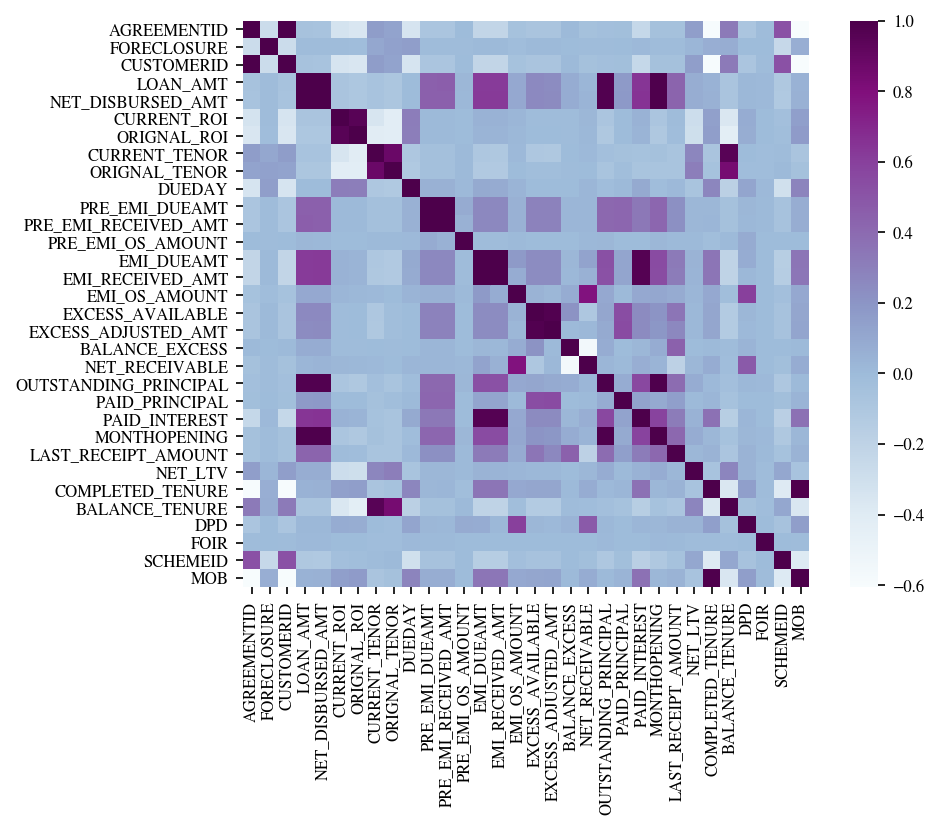

In [54]:
plt.figure(figsize=(7,5))
sns.heatmap(corr,square=True,cmap='BuPu')

In [0]:
train_data.drop(['customerid','last_receipt_date','last_receipt_amount','schemeid','npa_in_last_month','npa_in_current_month'],axis=1,inplace=True)

In [56]:
train_data.columns

Index(['agreementid', 'foreclosure', 'loan_amt', 'net_disbursed_amt',
       'interest_start_date', 'current_roi', 'orignal_roi', 'current_tenor',
       'orignal_tenor', 'dueday', 'authorizationdate', 'city',
       'pre_emi_dueamt', 'pre_emi_received_amt', 'pre_emi_os_amount',
       'emi_dueamt', 'emi_received_amt', 'emi_os_amount', 'excess_available',
       'excess_adjusted_amt', 'balance_excess', 'net_receivable',
       'outstanding_principal', 'paid_principal', 'paid_interest',
       'monthopening', 'net_ltv', 'completed_tenure', 'balance_tenure', 'dpd',
       'foir', 'product', 'mob', 'loan_amt_binned'],
      dtype='object')

In [0]:
train_data.drop(['interest_start_date', 'authorizationdate', 'city', 'product', 'loan_amt_binned'],axis=1,inplace=True)

In [0]:
from sklearn.model_selection import train_test_split

x_t, x_v, y_t, y_v = train_test_split(train_data.drop(['agreementid','foreclosure'],axis=1),train_data['foreclosure'],test_size=0.2,random_state=56)

In [0]:
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [62]:
%%time 

model= XGBClassifier(n_estimators=200)

model.fit(x_t,y_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
preds = model.predict(x_v)

preds

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
accuracy_score(preds,y_v)

0.905081623663521

In [69]:
f1_score(preds,y_v)

0.4264860069360432

In [72]:
confusion_matrix(preds,y_v)

array([[65162,  5982],
       [ 1129,  2644]])

In [0]:
#### Done!